Naive Bayes Classifier:
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       505
           1       0.99      0.82      0.90        95

    accuracy                           0.97       600
   macro avg       0.98      0.91      0.94       600
weighted avg       0.97      0.97      0.97       600



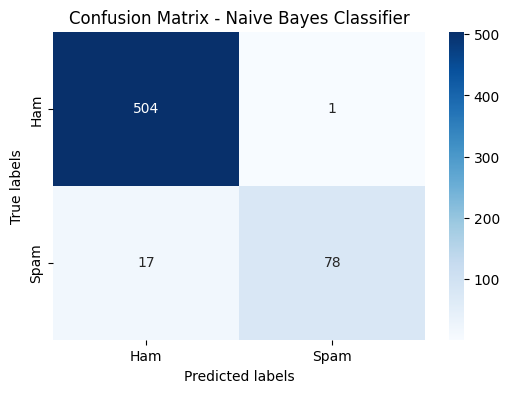


SVM Classifier:
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       505
           1       0.99      0.95      0.97        95

    accuracy                           0.99       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600



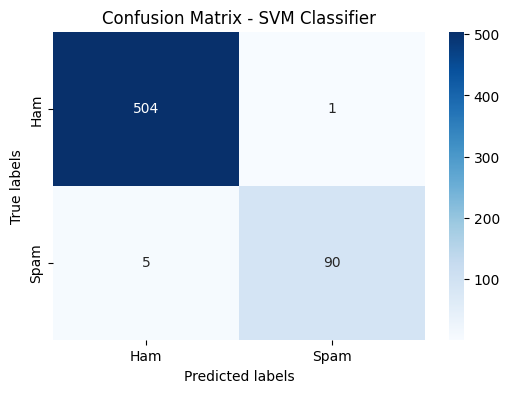

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:
{'C': 10}
Best cross-validation score:
0.9891666666666667

Best SVM Classifier:
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       505
           1       0.98      0.96      0.97        95

    accuracy                           0.99       600
   macro avg       0.99      0.98      0.98       600
weighted avg       0.99      0.99      0.99       600



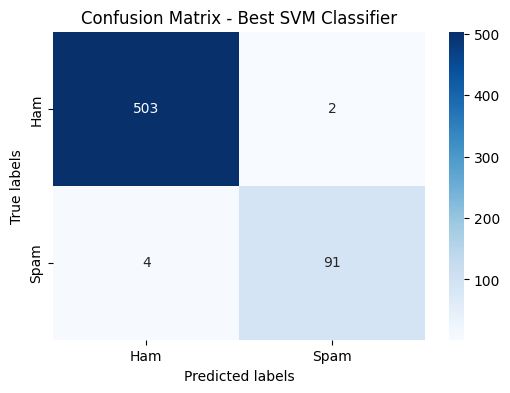

In [9]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
df = pd.read_csv('spam_or_not_spam.csv')

# Step 2: Data cleaning and preprocessing
def clean_text(text):
    # Check if text is NaN
    if pd.isnull(text):
        return ''
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert text to lowercase
    return text

# Apply cleaning function to 'email' column
df['cleaned_email'] = df['email'].apply(clean_text)

# Step 3: Feature extraction (TF-IDF Vectorization)
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['cleaned_email'])
y = df['label']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 5: Model selection and training (Naive Bayes)
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

# Step 6: Model evaluation (Naive Bayes)
y_pred_nb = clf_nb.predict(X_test)
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Step 7: Visualization (Confusion Matrix - Naive Bayes)
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_nb, title='Confusion Matrix - Naive Bayes Classifier')

# Step 8: Model selection and training (SVM - optional)
clf_svm = SVC(kernel='linear')
clf_svm.fit(X_train, y_train)

# Step 9: Model evaluation (SVM - optional)
y_pred_svm = clf_svm.predict(X_test)
print("\nSVM Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Step 10: Visualization (Confusion Matrix - SVM - optional)
plot_confusion_matrix(y_test, y_pred_svm, title='Confusion Matrix - SVM Classifier')

# Step 11: Model fine-tuning (optional)
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(clf_svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found:")
print(grid_search.best_params_)
print("Best cross-validation score:")
print(grid_search.best_score_)

# Step 12: Evaluate best model (SVM - optional)
best_clf_svm = grid_search.best_estimator_
y_pred_best_svm = best_clf_svm.predict(X_test)
print("\nBest SVM Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_svm))

# Step 13: Visualization (Confusion Matrix - Best SVM - optional)
plot_confusion_matrix(y_test, y_pred_best_svm, title='Confusion Matrix - Best SVM Classifier')

